# Adams Method

$$
y_{n+s} = y_{n+s-1} + \sum_{k=0}^{s-1}b_kf(t_{n+k}+y_{n+k})
$$
wher $b_k$ is defined with Lagrange Interpolation polynomials, $\rho_k(t)$ as 
$$
b_k = h^{-1} \int_{t_{s-1}}^{t_{s}} \rho_k(t) dt
$$
Also, an s-step Adams Method requiers a set of initial values rather than a point. In this notebook, implemented method calculates these initial values using Euler's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

In [3]:
def EulerSolver(y0,h,t):
    Ey = [y0]
    for i in t:
        n = np.where(t == i)
        n = n[0][0]
        yn = Ey[n] + h*(-Ey[n] + 2*np.cos(2*i)*np.exp(-i))
        Ey.append(yn)
    return Ey

In [4]:
#Interpolation Polynomial Calculation    

def intPol(x,x_val,f,y_val=None):
    L = []
    for i in x_val:
        l = []
        for j in range(len(x_val)):
            l.append(i**j)
        L.append(l)
    Van = np.array(L)
    y = np.array([])
    if type(y_val)==type(None):
        for i in x_val:
            y = np.append(y,f(i))
    else:
        for i in range(0,len(x_val)):
            y = np.append(y,f(x_val[i],y_val[i]))

    VanInv = np.linalg.inv(Van)
    C = np.linalg.solve(Van,y)
    s = np.zeros_like(x)
    for c in C:
        n = np.where(C==c)[0][0]
        s += c*x**n
    return s

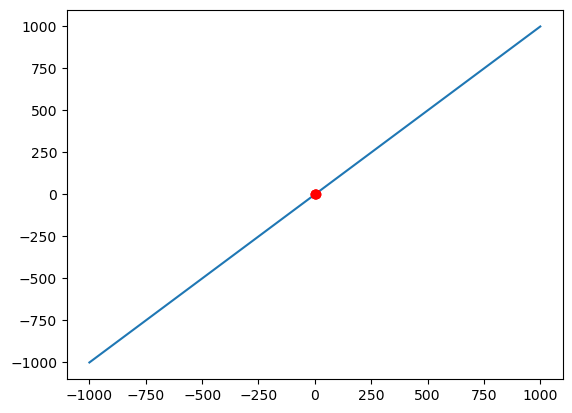

In [8]:
x = np.arange(-1000,1000,0.1)
x_val = np.array([0,1,2,3,4])
def f(x):
    return x
y = intPol(x,x_val,f)
plt.plot(x,y)
plt.plot(x_val,f(x_val),"ro")

In [5]:

def ABSolver1(y,f,t,s): #The interpolation polynomails are directly calculated by the above function and the integral is taken by using the scipy.integrate.quad()
    for i in t[:-s]:
        n = np.where(t==i)[0][0]
        t_val = t[n:n+s]
        yns = y[n+s-1] + si.quad(intPol,t[n+s-1],t[n+s],args=(t_val,f,y[n:n+s-1]))[0]
        y = np.append(y,yns)
    return y

In [6]:
#Another Adam-Bashford Solver
def lagPol(t,t_val,k): #Lagrange polynomial calculator
    p = 1
    tk = t_val[k]
    for tn in np.delete(t_val,k):
        p *= (t-tn)/(tk - tn)
    return p

def ABSolver2(y0,f,t,s,h):
    #Coefficient Calculation
    y = EulerSolver(0,h,t[:s-1])
    Coeff = np.array([])
    n = 1
    for i in range(s):
        b = si.quad(lagPol,t[n+s-1],t[n+s],args=(t[n:n+s],i)) #Calculating the integration with scipy.quad
        Coeff = np.append(Coeff,b[0]/h)
    print(f"Coeff:{Coeff}")
    for n in range(len(t)-s):
        #Calculating the summation
        S = 0
        for i in range(s):
            S += Coeff[i]*f(t[n+i],y[n+i])
        yns = y[-1] + h*S
        y.append(yns)
    
    return y

In [7]:
def f(t,y):
    return -y + 2*np.exp(-t)*np.cos(2*t)

h = 1e-2
t = np.arange(0,10,h)
soln = ABSolver2(0,f,t,3,h)

Coeff:[ 0.41666667 -1.33333333  1.91666667]


In [8]:
def yExact(t):
    soln = np.exp(-t)*np.sin(2*t)
    return soln

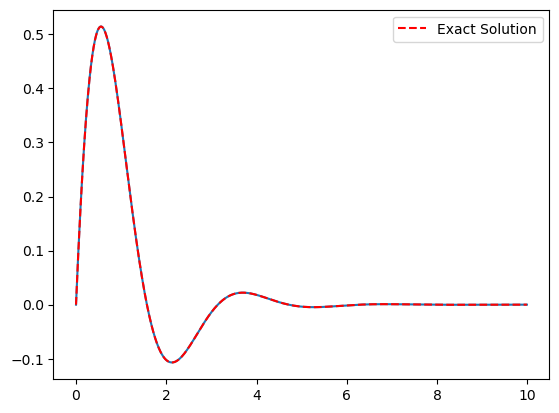

In [9]:
plt.plot(t,soln)
plt.plot(t,yExact(t),"r--",label="Exact Solution")
plt.legend()
plt.show()

Coeff:[1.]


/tmp/ipykernel_10697/3899023808.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,np.log(error))


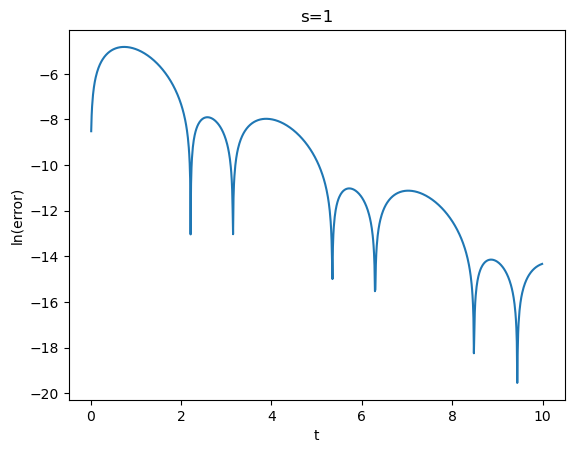

Coeff:[-0.5  1.5]


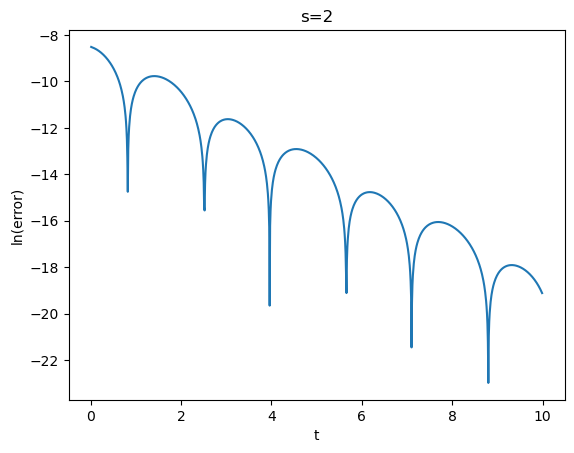

Coeff:[ 0.41666667 -1.33333333  1.91666667]


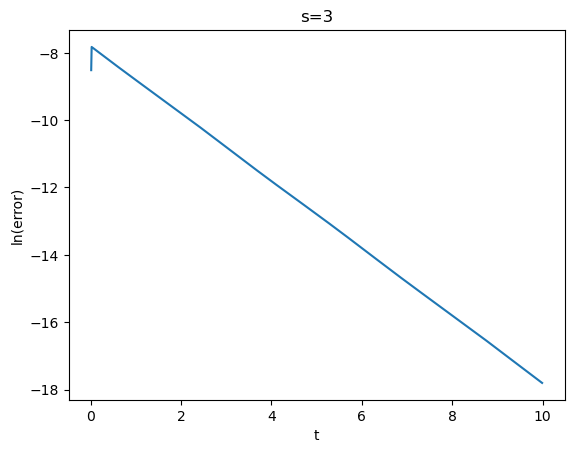

Coeff:[-0.375       1.54166667 -2.45833333  2.29166667]


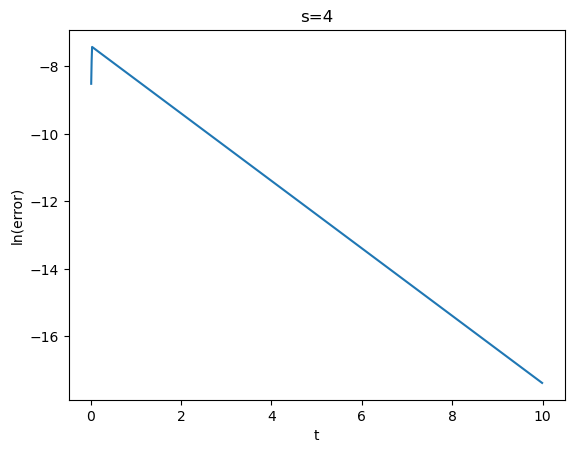

Coeff:[ 0.34861111 -1.76944444  3.63333333 -3.85277778  2.64027778]


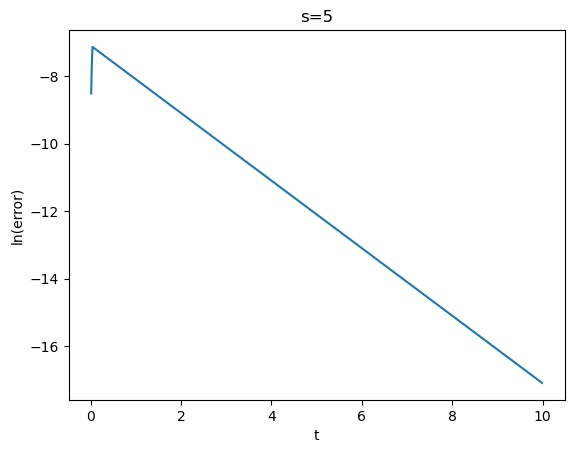

Coeff:[-0.32986111  1.99791667 -5.06805556  6.93194444 -5.50208333  2.97013889]


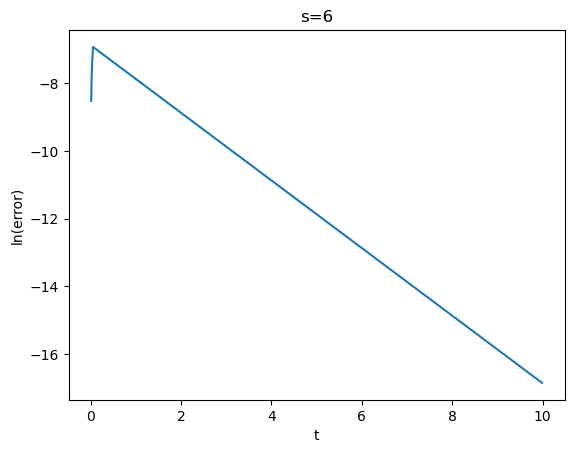

Coeff:[  0.31559193  -2.2234127    6.73179563 -11.37989418  11.66582341
  -7.39563492   3.28573082]


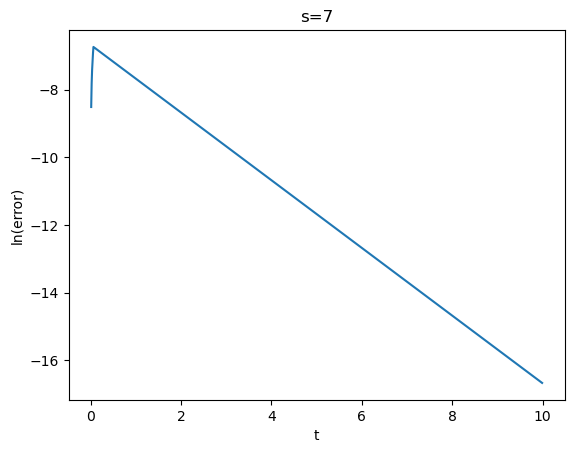

Coeff:[ -0.30422454   2.44516369  -8.61212798  17.37965443 -22.02775298
  18.05453869  -9.52520668   3.58995536]


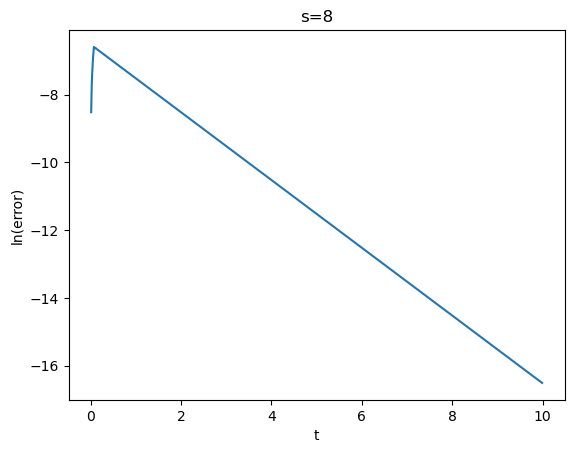

Coeff:[  0.294868    -2.66316854  10.7014677  -25.124736    38.02041446
 -38.540361    26.3108427  -11.88415068   3.88482336]


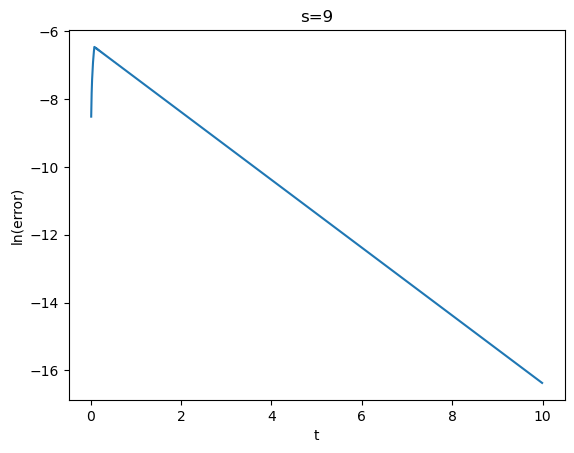

Coeff:[ -0.28697545   2.87764702 -12.99428461  34.8074052  -61.28364225
  74.17932071 -62.6462985   36.64195877 -14.4669297    4.1717988 ]


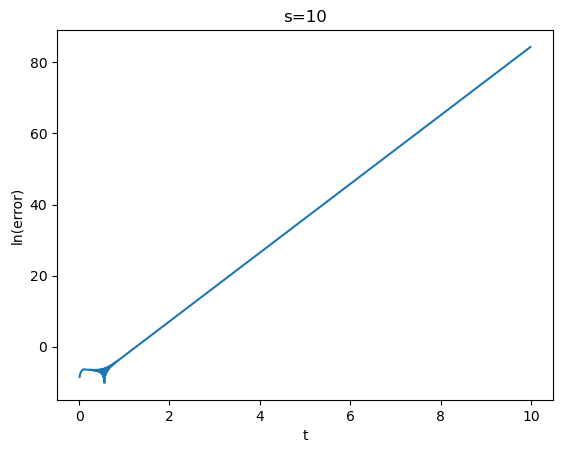

Coeff:[   0.2801896    -3.08887141   15.48617886  -46.61703619   93.64722046
 -131.89142055  133.01913597  -96.26905007   49.25049061  -17.26882567
    4.4519884 ]


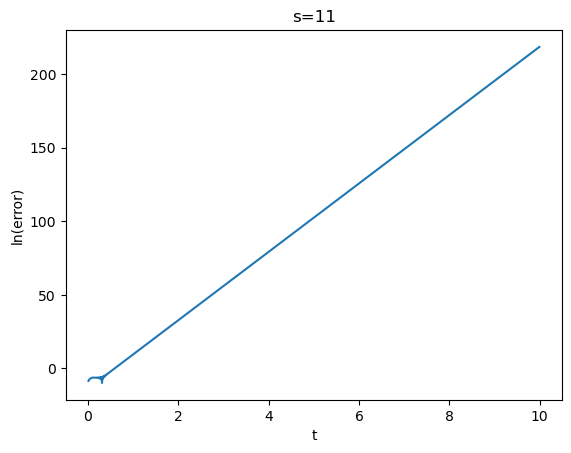

Coeff:[  -0.27426554    3.29711054  -18.17347611   60.73999296 -137.1246644
  220.35789995 -258.60210005  223.52676418 -141.52286418   64.33509532
  -20.28574661    4.72625394]


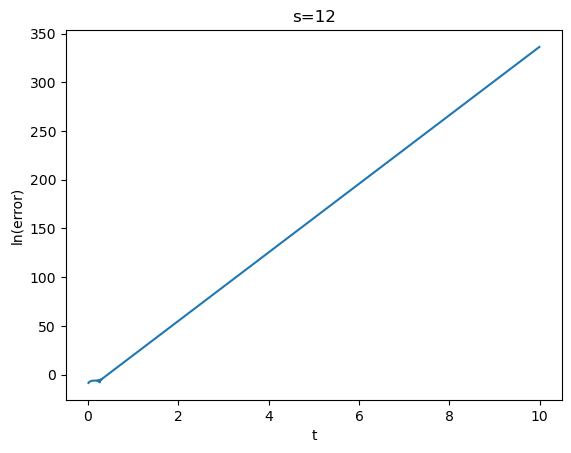

In [10]:
for i in range(1,13):
    soln = ABSolver2(0,f,t,i,h)

    error = abs(yExact(t) - soln)
    plt.plot(t,np.log(error))
    plt.xlabel("t")
    plt.ylabel("ln(error)")
    plt.title(f"s={i}")
    plt.show()

Coeff:[ 0.04166667 -0.13333333  0.19166667]
Coeff:[ 0.41666667 -1.33333333  1.91666667]
Coeff:[  4.16666667 -13.33333333  19.16666667]
Coeff:[  41.66666667 -133.33333333  191.66666667]


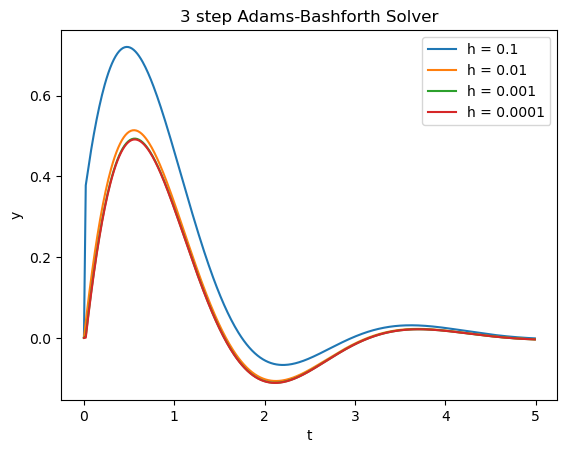

In [14]:
s = 3
for h in [1e-1,1e-2,1e-3,1e-4]:
    soln = ABSolver2(0,f,t,s,h)
    plt.plot(t,soln,label = f"h = {h}")

plt.xlabel("t")
plt.ylabel("y")
plt.title(f"{s} step Adams-Bashforth Solver")
plt.legend()
plt.show()

## A Convergent s-Step Method
2-Step Method given by characteristic polynomials
$$
\rho(\omega) = \omega^2-2.01\omega+1.01 \quad \text{and} \quad \sigma(\omega) = 0.995\omega-1.005
$$
is divergent 

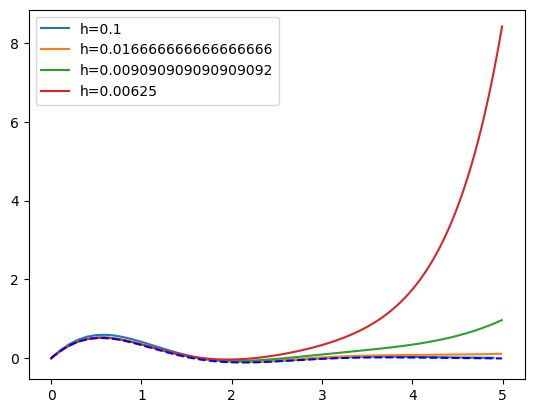

In [12]:
#A convergent multistep method trial
def MSsolver(y0,f,t,s,h):
    #Coefficient Calculation
    y = EulerSolver(0,h,t[:s-1])
    Coeff2 = [-1.005,0.995]
    for n in range(len(t)-s):
        #Calculating the summation
        S = 0
        for i in range(s):
            S += Coeff2[i]*f(t[n+i],y[n+i])
        yns = 2.01*y[-1] - 1.01*y[-2] + h*S
        y.append(yns)
    
    return y
for i in np.arange(1,20,5):
    h = 10**(-1)/i
    t = np.arange(0,5,h)
    soln = MSsolver(0,f,t,2,h)
    plt.plot(t,soln,label=f"h={h}")

plt.legend()
plt.plot(t,yExact(t),"b--")
plt.show()

/tmp/ipykernel_10697/2521218318.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(t,np.log(error),label=f"h={h}")


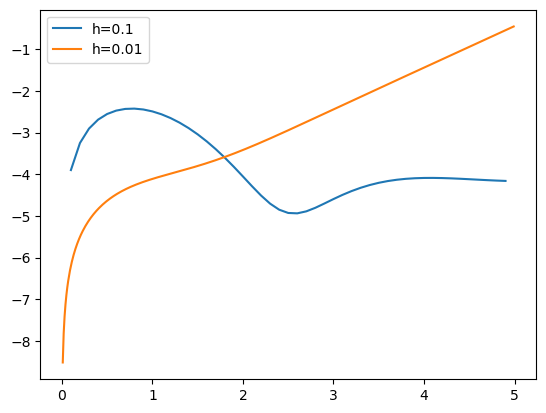

In [13]:

for i in range(1,3):
    h = 10**(-i)
    t = np.arange(0,5,h)
    soln = MSsolver(0,f,t,2,h)
    error = abs(yExact(t) - soln)
    plt.plot(t,np.log(error),label=f"h={h}")


plt.legend()
plt.show()